# Demo 1: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Compute square root: x = sqrt(y)

In [64]:
np.sqrt(20)

4.47213595499958

In [65]:
y = 30
x = 1
for k in range(1, 20):
    x = 0.5*(x + y/x)
    err = abs(x - np.sqrt(y))
    print(f'{k}: {x}, {err}')
    if err < 1e-9:
        break

1: 15.5, 10.022774424948338
2: 8.717741935483872, 3.2405163604322107
3: 6.079500014920474, 0.6022744398688129
4: 5.507058168194934, 0.029832593143273023
5: 5.477306378956984, 8.080390532239079e-05
6: 5.47722557564769, 5.960290039297433e-10


## Computer can't distinguish small difference

In [66]:
( 1 + 0.0000000000000001 ) - 1

0.0

In [67]:
epsilon = np.finfo(float).eps
print(epsilon)

2.220446049250313e-16


In [68]:
1e-100

1e-100

In [69]:
( 1 + epsilon*0.59) - 1

2.220446049250313e-16

In [70]:
def sqrt_diff_bad(x):
    return np.sqrt(x+1)-np.sqrt(x)

def sqrt_diff_good(x):
    return 1/(np.sqrt(x+1)+np.sqrt(x))

In [71]:
x = 1e32
sqrt_diff_bad(x), sqrt_diff_good(x)

(0.0, 5e-17)

## Computing Pi (3.141592) using Monte Carlo method 

In [2]:
n_sample = 1000

np.random.seed(1234567)
xy = np.random.rand(n_sample,2)

In [3]:
is_in_circle = (xy[:,0]**2 + xy[:,1]**2 < 1)

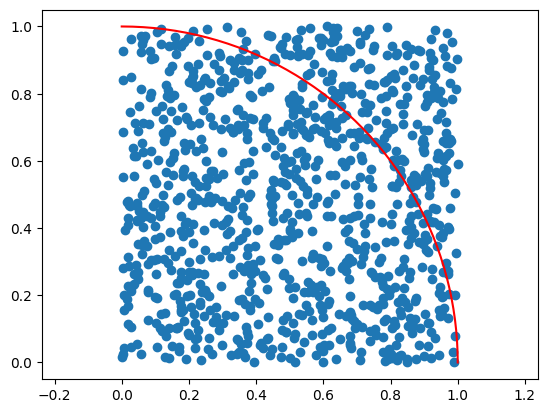

In [4]:
plt.scatter(xy[:,0], xy[:,1])
an = np.linspace(0, 0.5*np.pi, 50)
plt.plot(np.cos(an), np.sin(an), color='red')
plt.axis('equal')

plt.show()

In [5]:
ratio = sum(is_in_circle) / n_sample
ratio*4, ratio*4 - np.pi

(3.096, -0.04559265358979303)

In [7]:
def computePiMC_Ver1(n_points=1000, m_repeat=100):
    vals = np.zeros(m_repeat)
    for k in range(0, m_repeat):
        xy = np.random.rand(n_points, 2)
        is_in_circle = (xy[:,0]**2 + xy[:,1]**2 < 1)
        vals[k] = sum(is_in_circle) / n_points * 4.0
    
    return( [np.mean(vals), np.std(vals)] )

In [8]:
np.random.seed(1234567)
print( computePiMC_Ver1() )
print( computePiMC_Ver1(n_points=2000) )
print( computePiMC_Ver1(n_points=4000) )

[3.1438800000000002, 0.056671559004495387]
[3.1457999999999995, 0.0347131099154196]
[3.14487, 0.027787642937104222]


In [9]:
# antithetic method
def computePiMC_Ver2(n_points=1000, m_repeat=100):
    vals = np.zeros(m_repeat)
    for k in range(0, m_repeat):
        xy = np.random.rand(n_points//2, 2)
        xy = np.vstack((xy, 1-xy))
        is_in_circle = (xy[:,0]**2 + xy[:,1]**2 < 1)
        vals[k] = sum(is_in_circle) / n_points * 4.0
    
    return( [np.mean(vals), np.std(vals)] )

In [10]:
np.random.seed(1234567)
print( computePiMC_Ver2() )
print( computePiMC_Ver2(n_points=2000) )
print( computePiMC_Ver2(n_points=4000) )

[3.1467200000000006, 0.03861141800037914]
[3.1400599999999996, 0.030287231633148677]
[3.14218, 0.020381059835052735]


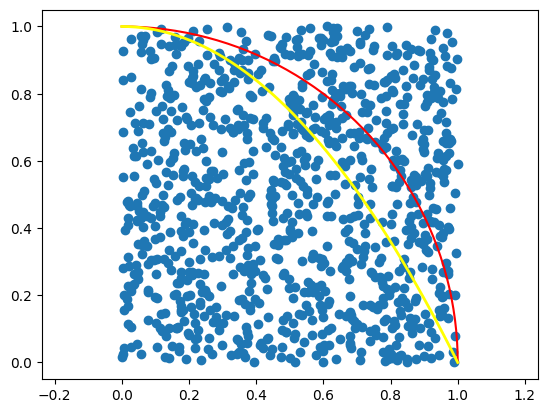

In [11]:
# Computing PI with Monte-Carlo 
plt.scatter(xy[:,0], xy[:,1])
an = np.linspace(0, 1, 50)
plt.plot(np.cos(0.5*np.pi*an), np.sin(0.5*np.pi*an), color='red')
plt.plot(an, 1-an**2, color='yellow', lw=2)
plt.axis('equal')
plt.show()

In [81]:
def computePiMC_Ver3(n_points=1000, m_repeat=100):
    vals = np.zeros(m_repeat)
    for k in range(0,m_repeat):
        xy = np.random.rand(n_points, 2)
        is_in_circle = (xy[:,0]**2 + xy[:,1]**2 < 1)
        is_in_parabola = (xy[:,1] + xy[:,0]**2 < 1)

        error_control = sum(is_in_parabola) / n_points - 2/3
        vals[k] = ( sum(is_in_circle) / n_points - error_control ) * 4.0 
    
    return( [np.mean(vals), np.std(vals)] )

In [82]:
# We get slighter better result (i.e., smaller std)
print( computePiMC_Ver3() )
print( computePiMC_Ver3(n_points=2000) )
print( computePiMC_Ver3(n_points=4000) )

[3.1424266666666667, 0.04207353562514089]
[3.142986666666667, 0.028728689493257426]
[3.145036666666666, 0.02339771570046955]


## Random number generation (How to repeat the same RNs)

In [20]:
state = np.random.get_state()
#state

In [21]:
np.random.rand(10)

array([0.88168384, 0.02146052, 0.76323634, 0.69741417, 0.2588192 ,
       0.61923984, 0.80678696, 0.61116654, 0.48091733, 0.58868219])

In [22]:
np.random.set_state(state)
#np.random.seed(1234567)

In [23]:
np.random.rand(10)

array([0.88168384, 0.02146052, 0.76323634, 0.69741417, 0.2588192 ,
       0.61923984, 0.80678696, 0.61116654, 0.48091733, 0.58868219])